# Chosing statistical test according to our dataset

dataset : 
https://www.kaggle.com/anthonyc1/gathering-real-news-for-oct-dec-2016
https://www.kaggle.com/mrisdal/fake-news


As we have only one dataset, we need to use test which can test the models on multiple folds of single datasets

Paired t-test would most suitable statistical test for this job


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#  Metrices for model evalaution 
from sklearn import metrics
from sklearn.metrics import classification_report , accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

# import stats for statistics related tasks
from scipy import stats

# loading and saving the results, and models
from sklearn.externals import joblib

In [5]:
# load our models trained on 6th day
lr = joblib.load( r'Day 5-6-7\LogisticRegression' )
svm = joblib.load( r'Day 5-6-7\LinearSVC' )

# load y_test, y_pred
y_test = joblib.load(r"Day 5-6-7\y_test" )
y_pred_lr = joblib.load(r"Day 5-6-7\y_pred_lr" )
y_pred_svm = joblib.load( r"Day 5-6-7\y_pred_svm" )



In [6]:
# calculaye fpr, tpr for LogisticRegression
fpr_lr, tpr_lr, thresholds_lr = metrics.roc_curve(y_test,  y_pred_lr)
# calculate Area Under the curve
auc_lr = metrics.roc_auc_score(y_test, y_pred_lr)

# calculaye fpr, tpr for LinearSVC
fpr_svm, tpr_svm, thresholds_svm = metrics.roc_curve(y_test,  y_pred_svm)
# calculate Area Under the curve
auc_svm = metrics.roc_auc_score(y_test, y_pred_svm)


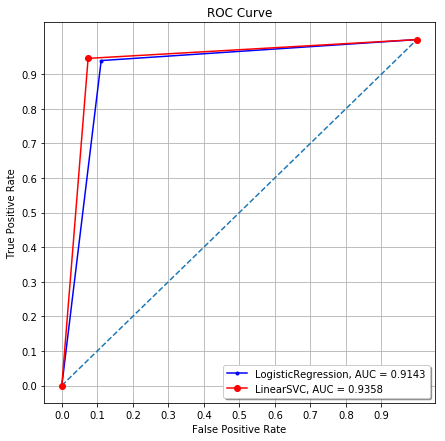

In [10]:

# Create plots with pre-defined labels.
fig, ax = plt.subplots(figsize=(7,7))

plt.xticks(np.arange(0, 1, 0.1))
plt.yticks(np.arange(0, 1, 0.1))


plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model

# LogisticRegression
ax.plot(fpr_lr, tpr_lr, marker='.', color = 'b',  label='LogisticRegression, AUC = '+str(round(auc_lr,4)))
# LinearSVC
ax.plot(fpr_svm, tpr_svm, marker='o', color = 'r',  label='LinearSVC, AUC = '+str(round(auc_svm,4)))

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.title('ROC Curve')
plt.grid(True)

legend = ax.legend(loc='lower right', shadow=True, fontsize='medium')

In [15]:
# it can be seen from the AUC curve above that LinearSVC is performing better than LogisticRegression
# accuracy wise but accuracies are very close, we need to see which model is better by performing 
# statistical t- test

# load 5- cross validation results of accuracies
results = joblib.load(r"Day 5-6-7\5-cross-val-score")


In [17]:
results

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.670954
1,RandomForestClassifier,1,0.672026
2,RandomForestClassifier,2,0.687869
3,RandomForestClassifier,3,0.674768
4,RandomForestClassifier,4,0.646355
5,LinearSVC,0,0.901572
6,LinearSVC,1,0.878528
7,LinearSVC,2,0.880293
8,LinearSVC,3,0.922445
9,LinearSVC,4,0.901358


In [18]:
# Separate results for both the models
res_lr  = results['accuracy'][results.model_name== 'LogisticRegression'].values
res_svm  = results['accuracy'][results.model_name== 'LinearSVC'].values

In [25]:
print(res_lr)
print(res_svm)

[0.8899607  0.85905681 0.88011435 0.90582559 0.89492495]
[0.90157199 0.87852805 0.88029301 0.9224446  0.90135811]


In [27]:
## scipy function
t, p = stats.ttest_ind( res_lr , res_svm )

# if p > alpha - > then there's no significance difference between two models
# if p < alpha -> then there is  significance difference between two models
# Chosing a threshold alpha for our models 
alpha = 0.5
sig_diff = ''
if p > alpha:
    sig_diff = '  No, there is no significant difference'
else:
    sig_diff = '  Yes, there is significant difference'
print("Alpha = " + str(alpha))
print("(LogisticRegression - LinearSVC)   t = " + str(round(t,4)) + "  p = " + str(round(p,4))+sig_diff)

alpha = 0.05
sig_diff = ''
if p > alpha:
    sig_diff = '  No, there is no significant difference'
else:
    sig_diff = '  Yes, there is significant difference'
print("Alpha = " + str(alpha))
print("(LogisticRegression - LinearSVC)   t = " + str(round(t,4)) + "  p = " + str(round(p,4))+sig_diff)


Alpha = 0.5
(LogisticRegression - LinearSVC)   t = -0.9608  p = 0.3648  Yes, there is significant difference
Alpha = 0.05
(LogisticRegression - LinearSVC)   t = -0.9608  p = 0.3648  No, there is no significant difference
